# Assigment 3
This assigment focuses on getting comfortable with working with multidimensional data and linear regression.
Key items include:
- Creating random n-dimensional data
- Creating a Model that can handle the data
- Plot a subset of the data along with the prediction
- Using a Dataset to read in and choose certain columns to produce a model
- Create several models from various combinations of columns
- Plot a few of the results

## 1. Create a 4 dimensional data set with 64 elements and show all 4  scatter 2D plots of the data $x_1$ vs. $y$, $x_2$ vs. $y$, etc.

In [44]:
n = 64
x = np.linspace(0, 2, n) + np.random.rand(4, n)
x = np.vstack([x, np.ones(len(x.T))]).T
y = np.linspace(0, 2, n) + np.random.rand(n) - 1

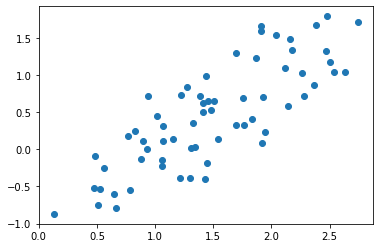

In [45]:
plt.scatter(x.T[0], y)

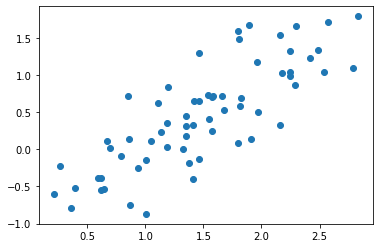

In [46]:
plt.scatter(x.T[1], y)

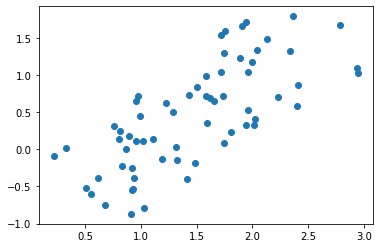

In [47]:
plt.scatter(x.T[2], y)

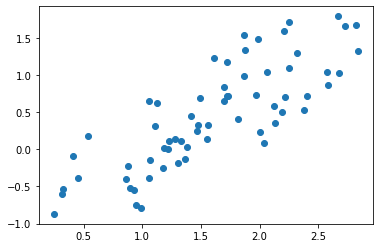

In [48]:
plt.scatter(x.T[3], y)

## 2.  Create a Linear Regression model to fit the data. Use the example from Lesson 3 and do not use a library that calculates automatically. We are expecting 5 coefficients to describe the linear model.

In [49]:
left = np.linalg.inv(np.dot(x.T, x))

In [50]:
right = np.dot(y.T, x)

In [51]:
beta = np.dot(left, right)
beta

array([ 0.31440277,  0.39029696, -0.12158306,  0.40989661, -1.06881463])

## 3. Plot the model's prediction as a different color on top of the scatter plot from Q1 in 2D for all 4 of the dimensions ($x_1 \rightarrow y_p, x_2 \rightarrow y_p, x_3 \rightarrow y_p, x_4 \rightarrow y_p$) 

In [52]:
pred = np.dot(x, beta)

Text(0.5, 1.0, 'Predictions vs Actual (x1)')

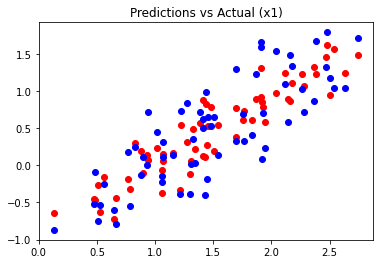

In [53]:
plt.scatter(x.T[0], pred, c='red')
plt.scatter(x.T[0], y, c='b')
plt.title("Predictions vs Actual (x1)")


Text(0.5, 1.0, 'Predictions vs Actual (x2)')

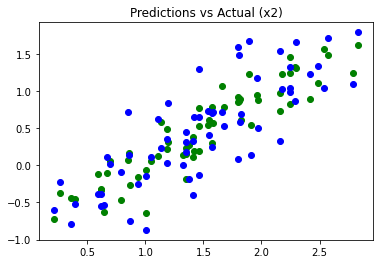

In [54]:
plt.scatter(x.T[1], pred, c='green')
plt.scatter(x.T[1], y, c='b')
plt.title("Predictions vs Actual (x2)")

Text(0.5, 1.0, 'Predictions vs Actual (x3)')

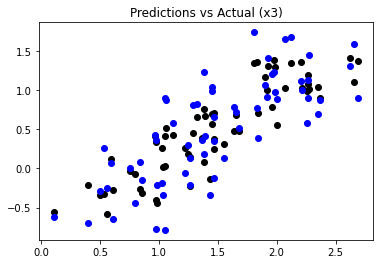

In [16]:
plt.scatter(x.T[2], pred, c='black')
plt.scatter(x.T[2], y, c='b')
plt.title("Predictions vs Actual (x3)")

Text(0.5, 1.0, 'Predictions vs Actual (x4)')

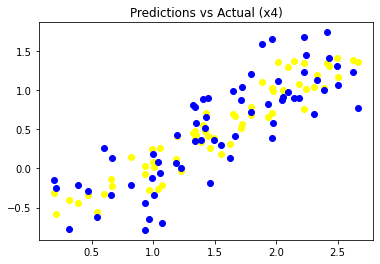

In [17]:
plt.scatter(x.T[3], pred, c='yellow')
plt.scatter(x.T[3], y, c='b')
plt.title("Predictions vs Actual (x4)")

## 4. Read in `mlnn/data/Credit.csv` with Pandas and build a Linear Regression model to predict Credit Rating (`Rating`). Use only the numeric columns in your model, but feel free to experiment which which columns you believe are better predicters of Credit Rating

In [19]:
import pandas as pd
import numpy as np
credit = pd.read_csv('../data/Credit.csv')
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


## Choose multiple columns as inputs beyond `Income` and `Limit` but clearly, don't use `Rating`

In [20]:
columns = ['Income', 'Limit', 'Education']
X = credit[columns].values
X = np.vstack([X.T, np.ones(len(X))]).T
X

array([[1.48910e+01, 3.60600e+03, 1.10000e+01, 1.00000e+00],
       [1.06025e+02, 6.64500e+03, 1.50000e+01, 1.00000e+00],
       [1.04593e+02, 7.07500e+03, 1.10000e+01, 1.00000e+00],
       ...,
       [5.78720e+01, 4.17100e+03, 1.20000e+01, 1.00000e+00],
       [3.77280e+01, 2.52500e+03, 1.30000e+01, 1.00000e+00],
       [1.87010e+01, 5.52400e+03, 7.00000e+00, 1.00000e+00]])

In [22]:
Y = credit['Rating']


In [24]:
beta = np.linalg.lstsq(X, Y)[0]
beta

<ipython-input-24-171266e716c0>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(X, Y)[0]


array([ 2.00410352e-02,  6.65704147e-02, -3.27893325e-01,  4.31930762e+01])

In [25]:
pred = np.dot(X, beta)

### 5. Plot your results. Show as many of your columns vs. credit rating that you can. 

Text(0.5, 1.0, 'Credit rating: predicted vs. actual')

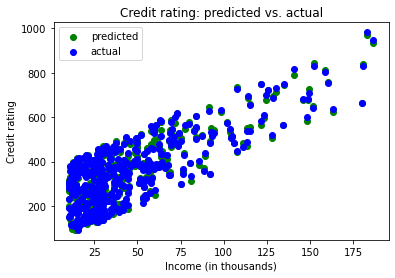

In [29]:
predicted_0 = plt.scatter(X.T[0], pred, c='green')
actual_0 = plt.scatter(X.T[0], Y, c='b')
plt.xlabel("Income (in thousands)")
plt.ylabel("Credit rating")
plt.legend((predicted_0, actual_0), ("predicted", "actual"))
plt.title("Credit rating: predicted vs. actual")

Text(0.5, 1.0, 'Credit rating: predicted vs. actual')

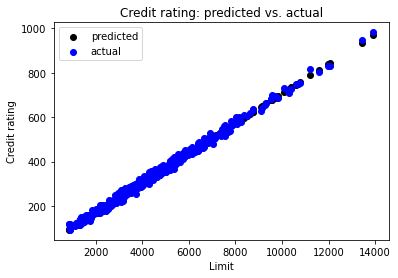

In [27]:
predicted_1 = plt.scatter(X.T[1], pred, c='black')
actual_1 = plt.scatter(X.T[1], Y, c='b')
plt.xlabel("Limit")
plt.ylabel("Credit rating")
plt.legend((predicted_1, actual_1), ("predicted", "actual"))
plt.title("Limit: predicted vs. actual")
plt.title("Credit rating: predicted vs. actual")

Text(0.5, 1.0, 'Credit rating: predicted vs. actual')

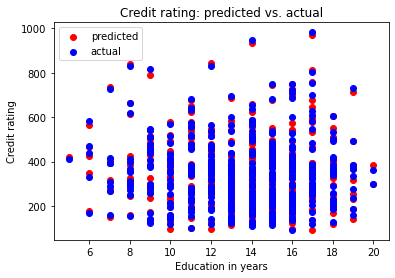

In [28]:
predicted_2 = plt.scatter(X.T[2], pred, c='red')
actual_2 = plt.scatter(X.T[2], Y, c='b')
plt.xlabel("Education in years")
plt.ylabel("Credit rating")
plt.legend((predicted_2, actual_2), ("predicted", "actual"))
plt.title("Credit rating: predicted vs. actual")